#  Implementing Feature Engineering with Snowflake & Feature Store

In [1]:
!pip install --quiet snowflake-connector-python pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from snowflake.connector import connect


conn = connect(
    user='SohanMeshram',
    password='HansoSohan1234',
    account='idnaiaw-me08486',
    warehouse='CHURN_PRED',
    database='CHURN_DB',
    schema='PUBLIC'
)

cursor = conn.cursor()

In [4]:
query = "SELECT * FROM CHURN_DATA"
cursor.execute(query)

df = cursor.fetch_pandas_all()
print("Raw data extracted from Snowflake:")
print(df.head())


Raw data extracted from Snowflake:
   CUSTOMERID  GENDER  SENIORCITIZEN  PARTNER  DEPENDENTS  TENURE  \
0  7590-VHVEG  Female              0     True       False       1   
1  5575-GNVDE    Male              0    False       False      34   
2  3668-QPYBK    Male              0    False       False       2   
3  7795-CFOCW    Male              0    False       False      45   
4  9237-HQITU  Female              0    False       False       2   

   PHONESERVICE     MULTIPLELINES INTERNETSERVICE ONLINESECURITY  ...  \
0         False  No phone service             DSL             No  ...   
1          True                No             DSL            Yes  ...   
2          True                No             DSL            Yes  ...   
3         False  No phone service             DSL            Yes  ...   
4          True                No     Fiber optic             No  ...   

  DEVICEPROTECTION TECHSUPPORT STREAMINGTV STREAMINGMOVIES        CONTRACT  \
0               No          No   

In [5]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,True,False,1,False,No phone service,DSL,No,...,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,No,DSL,Yes,...,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,0,False,False,2,True,No,DSL,Yes,...,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,False,False,45,False,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,No,Fiber optic,No,...,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [6]:
df.isnull().sum()

,0
CUSTOMERID,0
GENDER,0
SENIORCITIZEN,0
PARTNER,0
DEPENDENTS,0
TENURE,0
PHONESERVICE,0
MULTIPLELINES,0
INTERNETSERVICE,0
ONLINESECURITY,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUSTOMERID        7043 non-null   object 
 1   GENDER            7043 non-null   object 
 2   SENIORCITIZEN     7043 non-null   int8   
 3   PARTNER           7043 non-null   bool   
 4   DEPENDENTS        7043 non-null   bool   
 5   TENURE            7043 non-null   int8   
 6   PHONESERVICE      7043 non-null   bool   
 7   MULTIPLELINES     7043 non-null   object 
 8   INTERNETSERVICE   7043 non-null   object 
 9   ONLINESECURITY    7043 non-null   object 
 10  ONLINEBACKUP      7043 non-null   object 
 11  DEVICEPROTECTION  7043 non-null   object 
 12  TECHSUPPORT       7043 non-null   object 
 13  STREAMINGTV       7043 non-null   object 
 14  STREAMINGMOVIES   7043 non-null   object 
 15  CONTRACT          7043 non-null   object 
 16  PAPERLESSBILLING  7043 non-null   bool   


In [8]:
df = df.drop(['CUSTOMERID'], axis = 1)

In [9]:
df[np.isnan(df['TOTALCHARGES'])]

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
488,Female,0,True,True,0,False,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,NaN,False
753,Male,0,False,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,NaN,False
936,Female,0,True,True,0,True,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,NaN,False
1082,Male,0,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,NaN,False
1340,Female,0,True,True,0,False,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,NaN,False
3331,Male,0,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,NaN,False
3826,Male,0,True,True,0,True,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,NaN,False
4380,Female,0,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,NaN,False
5218,Male,0,True,True,0,True,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,NaN,False
6670,Female,0,True,True,0,True,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,NaN,False


In [10]:
df.fillna(df["TOTALCHARGES"].mean())

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,Female,0,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,Male,0,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,Male,0,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,Male,0,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,True,True,24,True,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,True,Mailed check,84.80,1990.50,False
7039,Female,0,True,True,72,True,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,True,Credit card (automatic),103.20,7362.90,False
7040,Female,0,True,True,11,False,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,True,Electronic check,29.60,346.45,False
7041,Male,1,True,False,4,True,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Mailed check,74.40,306.60,True


In [11]:
df[df['TENURE'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(labels=df[df['TENURE'] == 0].index, axis=0, inplace=True)
df[df['TENURE'] == 0].index

Index([], dtype='int64')

In [13]:
df.isnull().sum()

,0
GENDER,0
SENIORCITIZEN,0
PARTNER,0
DEPENDENTS,0
TENURE,0
PHONESERVICE,0
MULTIPLELINES,0
INTERNETSERVICE,0
ONLINESECURITY,0
ONLINEBACKUP,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7032 non-null   object 
 1   SENIORCITIZEN     7032 non-null   int8   
 2   PARTNER           7032 non-null   bool   
 3   DEPENDENTS        7032 non-null   bool   
 4   TENURE            7032 non-null   int8   
 5   PHONESERVICE      7032 non-null   bool   
 6   MULTIPLELINES     7032 non-null   object 
 7   INTERNETSERVICE   7032 non-null   object 
 8   ONLINESECURITY    7032 non-null   object 
 9   ONLINEBACKUP      7032 non-null   object 
 10  DEVICEPROTECTION  7032 non-null   object 
 11  TECHSUPPORT       7032 non-null   object 
 12  STREAMINGTV       7032 non-null   object 
 13  STREAMINGMOVIES   7032 non-null   object 
 14  CONTRACT          7032 non-null   object 
 15  PAPERLESSBILLING  7032 non-null   bool   
 16  PAYMENTMETHOD     7032 non-null   object 
 17  

In [15]:
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,Female,0,True,False,1,False,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,True,Electronic check,29.85,29.85,False
1,Male,0,False,False,34,True,No,DSL,Yes,No,Yes,No,No,No,One year,False,Mailed check,56.95,1889.50,False
2,Male,0,False,False,2,True,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,True,Mailed check,53.85,108.15,True
3,Male,0,False,False,45,False,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,False,False,2,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,70.70,151.65,True


In [16]:
df.columns

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN'],
      dtype='object')

In [17]:
import pandas as pd

# For each categorical feature, calculate churn rate by category
categorical_features = ['GENDER', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE',
                       'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
                       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
                       'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT',
                       'PAPERLESSBILLING', 'PAYMENTMETHOD']

for feature in categorical_features:
    print(f"\nChurn rates by {feature}:")
    print(df.groupby(feature)['CHURN'].mean().sort_values(ascending=False))


Churn rates by GENDER:
GENDER
Female    0.269595
Male      0.262046
Name: CHURN, dtype: float64

Churn rates by PARTNER:
PARTNER
False    0.329761
True     0.197171
Name: CHURN, dtype: float64

Churn rates by DEPENDENTS:
DEPENDENTS
False    0.312791
True     0.155312
Name: CHURN, dtype: float64

Churn rates by PHONESERVICE:
PHONESERVICE
True     0.267475
False    0.250000
Name: CHURN, dtype: float64

Churn rates by MULTIPLELINES:
MULTIPLELINES
Yes                 0.286485
No                  0.250812
No phone service    0.250000
Name: CHURN, dtype: float64

Churn rates by INTERNETSERVICE:
INTERNETSERVICE
Fiber optic    0.418928
DSL            0.189983
No             0.074342
Name: CHURN, dtype: float64

Churn rates by ONLINESECURITY:
ONLINESECURITY
No                     0.417787
Yes                    0.146402
No internet service    0.074342
Name: CHURN, dtype: float64

Churn rates by ONLINEBACKUP:
ONLINEBACKUP
No                     0.399417
Yes                    0.215670
No intern

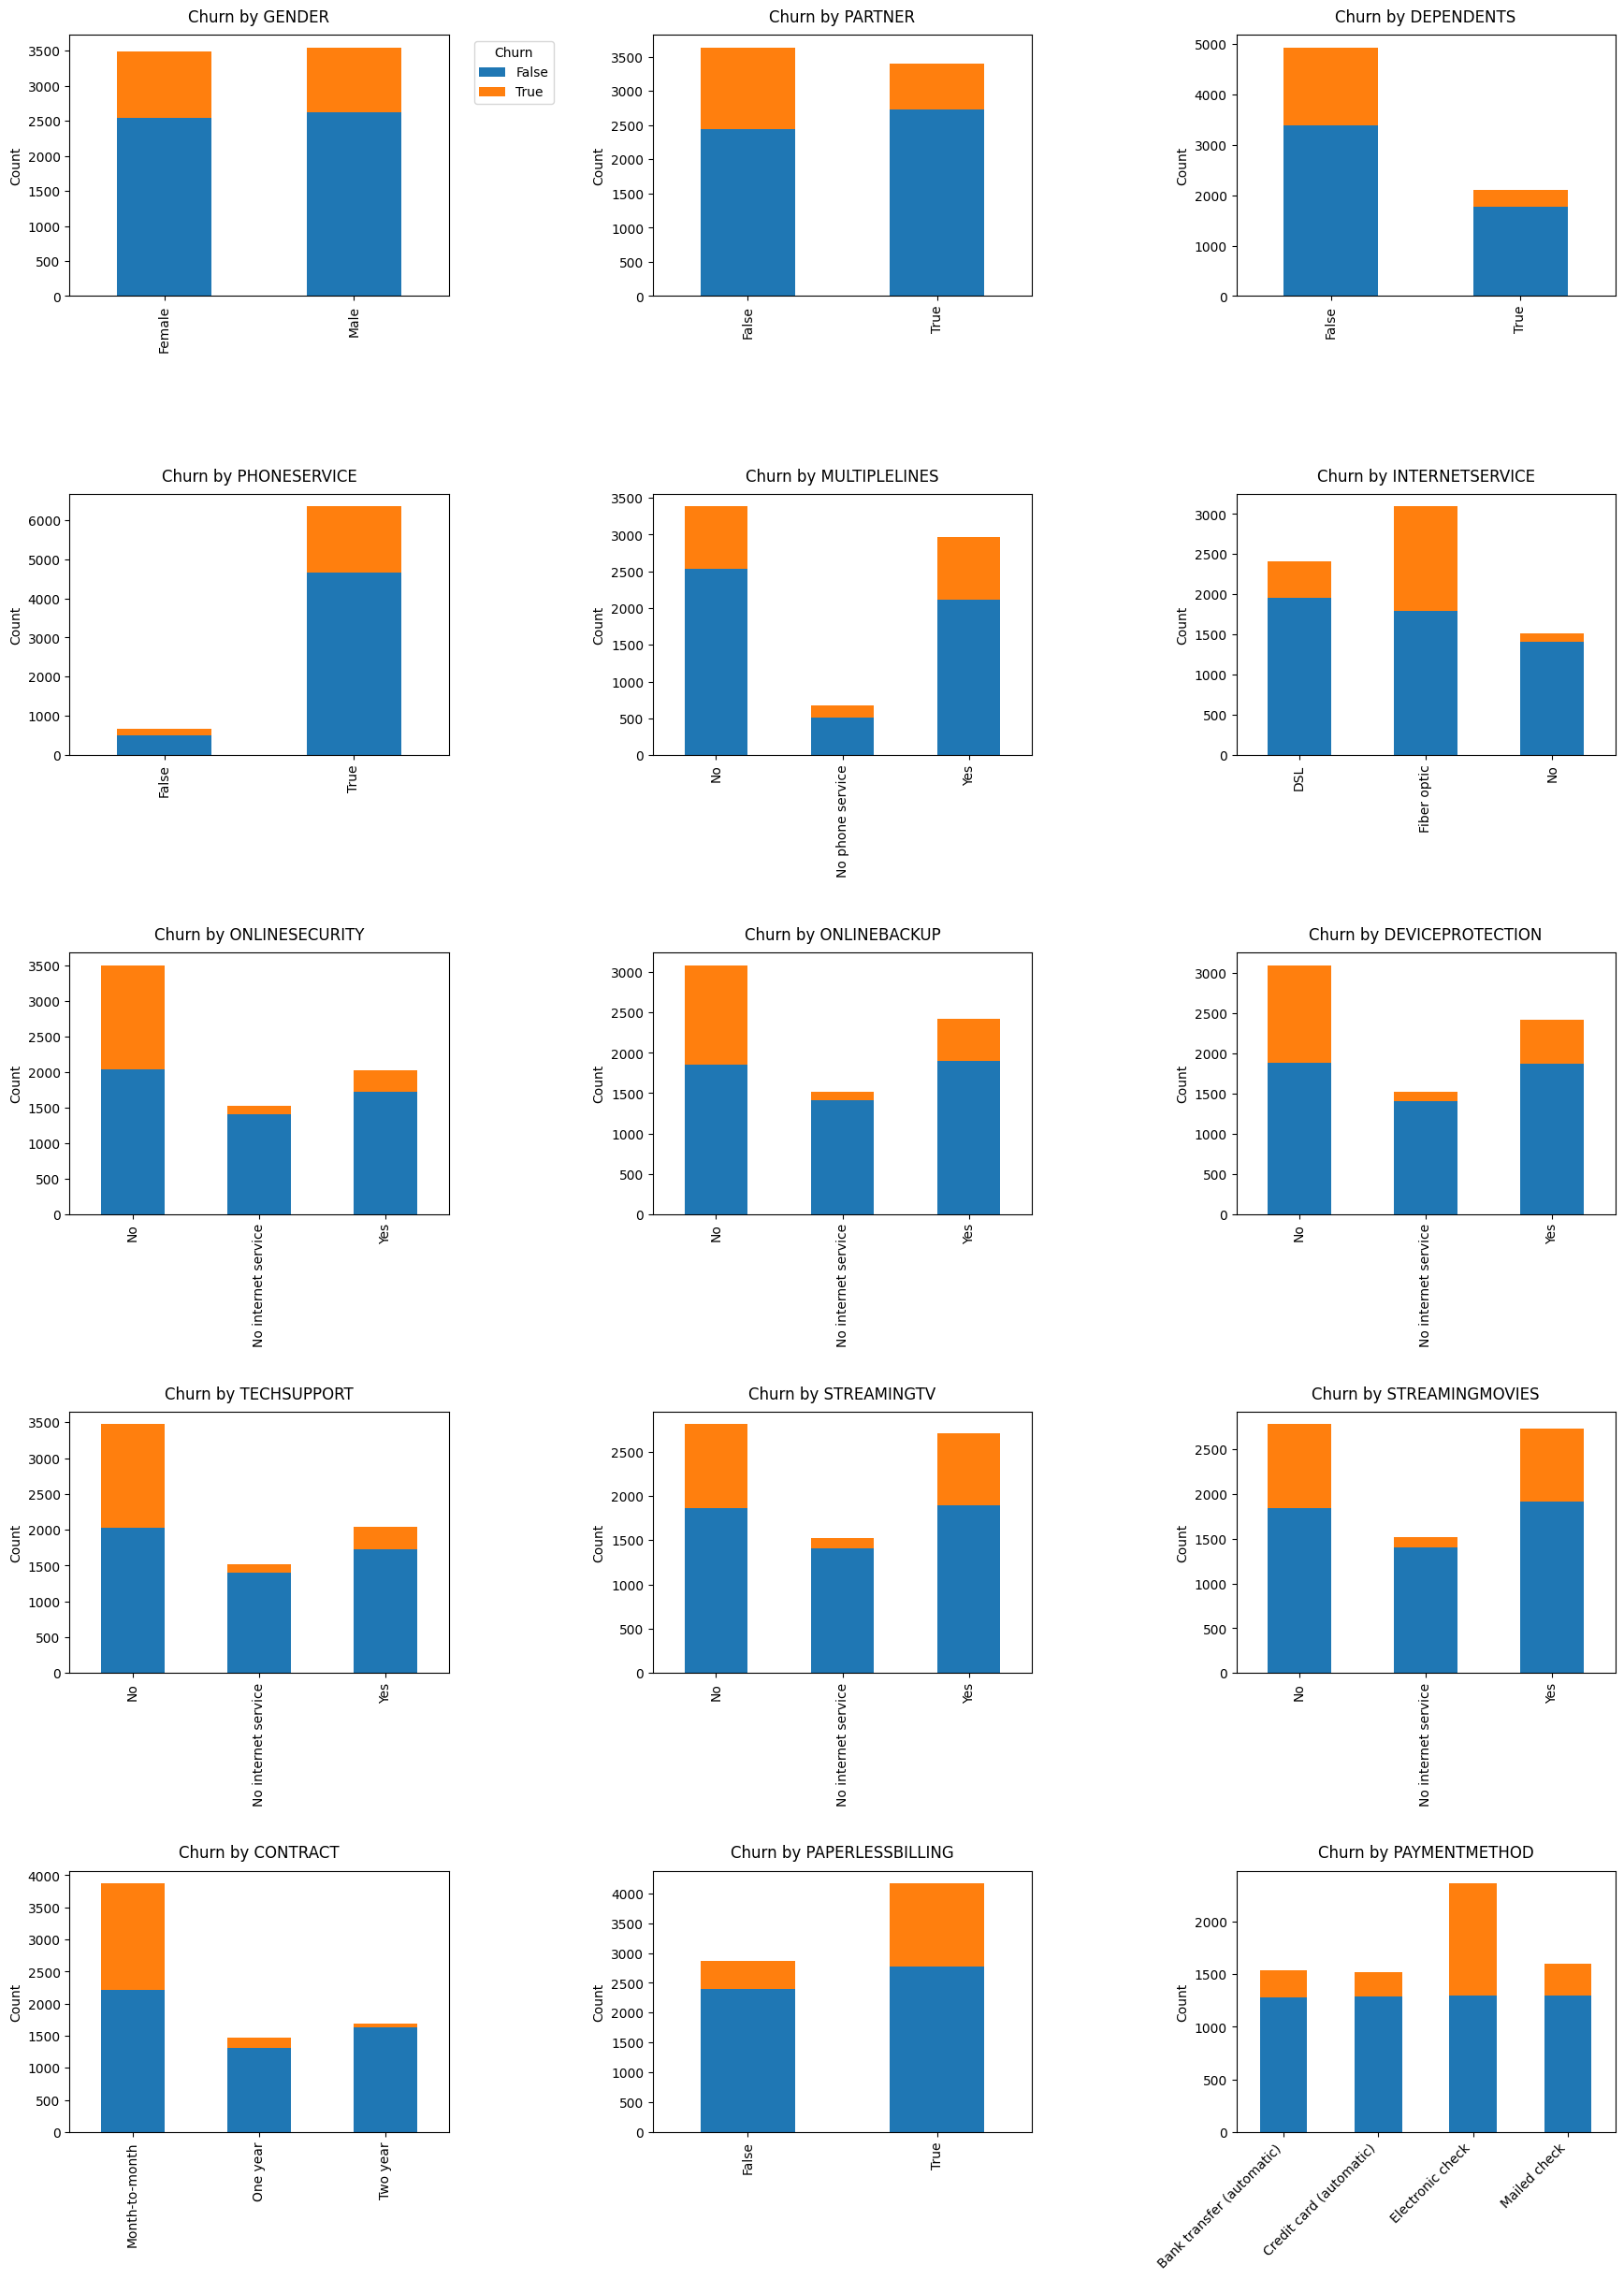

In [18]:
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5*n_rows))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)

    ctab = pd.crosstab(df[feature], df['CHURN'])
    ctab.plot(kind='bar', stacked=True, ax=plt.gca())

    plt.title(f'Churn by {feature}', pad=10)
    plt.ylabel('Count')
    plt.xlabel('')

    if len(ctab.index) > 3:
        plt.xticks(rotation=45, ha='right')

    if i != 1:
        plt.legend().remove()
    else:
        plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=3.0)
plt.show()

In [19]:
df = df.drop(['GENDER'], axis=1)

In [20]:
# Encode categorical columns
cols = ['PARTNER', 'DEPENDENTS', 'PHONESERVICE',
                    'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
                    'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
                    'STREAMINGTV', 'STREAMINGMOVIES', 'CONTRACT',
                    'PAPERLESSBILLING', 'PAYMENTMETHOD']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [21]:
df['CHURN'] = df['CHURN'].astype(int)


In [22]:
scaler = StandardScaler()
df[['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']] = scaler.fit_transform(
    df[['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES']]
)

In [23]:
df.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [24]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [25]:
X = df.drop('CHURN', axis=1)
y = df['CHURN']

In [26]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_smote, y_smote)

df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['CHURN'])], axis=1)

In [27]:
df_smote.shape

(9963, 19)

In [28]:
df = df_smote

In [29]:
df.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [30]:
from snowflake.connector.pandas_tools import write_pandas


success, nchunks, nrows, _ = write_pandas(
    conn,
    df,
    table_name="FEATURE_STORE",
    auto_create_table=True,
    overwrite=True
)

print(f" Features loaded into Snowflake Feature Store table (rows: {nrows})")

 Features loaded into Snowflake Feature Store table (rows: 9963)


In [31]:
# Retrieve features for model training
query = "SELECT * FROM FEATURE_STORE"
features_df = pd.read_sql(query, conn)


In [32]:
features_df

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,0,0,0,1.024885,1,2,1,0,2,2,0,2,2,1,1,0,1.288723,1.600135,1
9959,0,0,0,-0.981796,1,0,1,0,2,0,0,2,2,0,0,2,1.010343,-0.638065,1
9960,0,0,0,-1.117272,1,0,2,1,1,1,1,1,1,0,0,3,-1.503054,-0.952482,1
9961,0,0,0,-1.239504,1,0,1,0,0,0,0,2,0,0,1,2,0.498521,-0.940544,1


In [33]:
# Train model
X = features_df.drop('CHURN', axis=1)
y = features_df['CHURN']


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=69)

In [36]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [37]:
y_pred_rf = rf_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      2608
           1       0.80      0.85      0.83      2374

    accuracy                           0.83      4982
   macro avg       0.83      0.83      0.83      4982
weighted avg       0.83      0.83      0.83      4982

